Text(0.5, 1.0, 'Label')

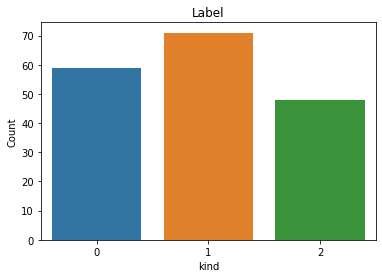

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

wine_data = load_wine()
df_data=pd.DataFrame(wine_data.data, columns= wine_data.feature_names)
df_target=pd.DataFrame(wine_data.target, columns=["kind"])
totall_data= pd.concat([df_data,df_target], axis=1)
sns.countplot(data=totall_data, x="kind")
plt.xlabel("kind")
plt.ylabel("Count")
plt.title("Label")

In [2]:
totall_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,kind
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [3]:
data=totall_data.drop("kind", axis=1)

In [4]:
data=data.to_numpy()

In [5]:
data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
from sklearn.cluster import KMeans
wcss= []
for i in range(2,11):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter= 300, n_init = 10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    


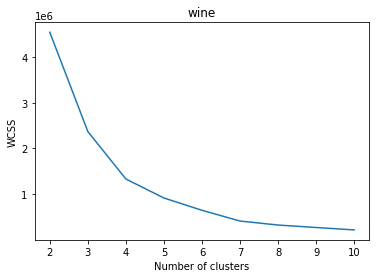

In [8]:
plt.plot(range(2,11), wcss)
plt.title('wine')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<AxesSubplot:xlabel='kind', ylabel='alcohol'>

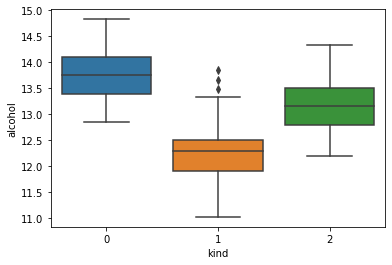

In [10]:
sns.boxplot(x='kind',y='alcohol',data=totall_data)

<AxesSubplot:xlabel='kind', ylabel='hue'>

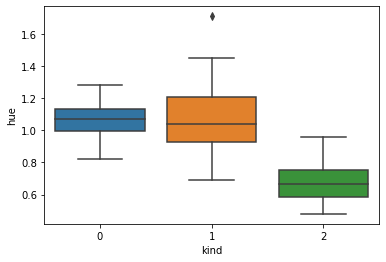

In [11]:
sns.boxplot(x='kind',y='hue',data=totall_data)

In [12]:
totall_data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'kind'],
      dtype='object')

C:\Users\kimbj\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\kimbj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kimbj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kimbj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot`

C:\Users\kimbj\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\kimbj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kimbj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kimbj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot`

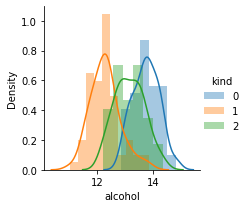

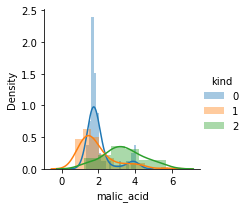

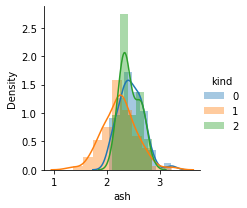

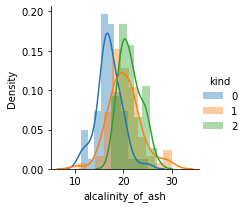

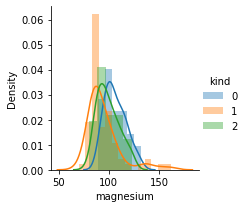

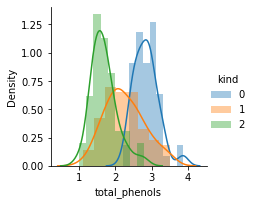

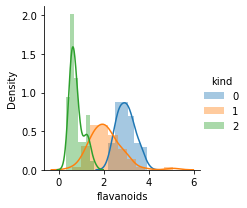

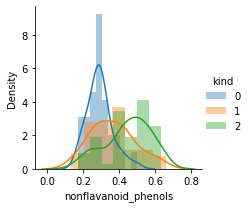

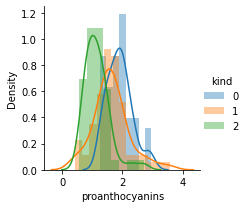

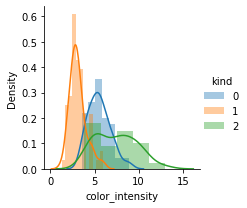

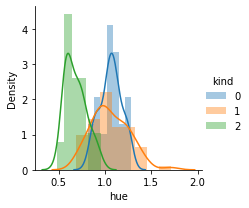

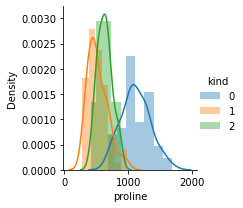

In [13]:
sns.FacetGrid(totall_data, hue="kind",size=3).map(sns.distplot,"alcohol").add_legend()
sns.FacetGrid(totall_data, hue="kind",size=3).map(sns.distplot,"malic_acid").add_legend()
sns.FacetGrid(totall_data, hue="kind",size=3).map(sns.distplot,"ash").add_legend()
sns.FacetGrid(totall_data, hue="kind",size=3).map(sns.distplot,"alcalinity_of_ash").add_legend()
sns.FacetGrid(totall_data, hue="kind",size=3).map(sns.distplot,"magnesium").add_legend()
sns.FacetGrid(totall_data, hue="kind",size=3).map(sns.distplot,"total_phenols").add_legend()
sns.FacetGrid(totall_data, hue="kind",size=3).map(sns.distplot,"flavanoids").add_legend()
sns.FacetGrid(totall_data, hue="kind",size=3).map(sns.distplot,"nonflavanoid_phenols").add_legend()
sns.FacetGrid(totall_data, hue="kind",size=3).map(sns.distplot,"proanthocyanins").add_legend()
sns.FacetGrid(totall_data, hue="kind",size=3).map(sns.distplot,"color_intensity").add_legend()
sns.FacetGrid(totall_data, hue="kind",size=3).map(sns.distplot,"hue").add_legend()
sns.FacetGrid(totall_data, hue="kind",size=3).map(sns.distplot,"proline").add_legend()
plt.show()